In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
file_path = 'Scoring02.xlsx'
df = pd.read_excel(file_path)
df



,Пол,Возраст,Семейное положение,Повторный клиент,Сумма выдачи номинал,Срок,Образование,Тип бизнеса,Длительность самой долгой единовременной просрочки в течение цикла,Год,Age
0,Муж,21.03.1997,Married,Старый клиент,5000,12,Высшее образование,4. Савдо / Торговля,0,1997,26
1,Муж,16.05.1986,Married,Старый клиент,4000,12,Высшее образование,3. Хизматрасони/Услуги,0,1986,37
2,Муж,08.12.1971,Married,Старый клиент,30000,12,Высшее образование,4. Савдо / Торговля,0,1971,52
3,Муж,02.04.1990,Married,Новый клиент,40000,24,Высшее образование,3. Хизматрасони/Услуги,0,1990,33
4,Муж,10.06.1988,Married,Старый клиент,40000,24,Высшее образование,3. Хизматрасони/Услуги,0,1988,35
...,...,...,...,...,...,...,...,...,...,...,...
2889,Муж,21.08.1996,Single,Старый клиент,10000,12,Сред.спец.образ-ние,1. Карзи истеъмоли/Потребительский кредит,358,1996,27
2890,Муж,11.07.1994,Married,Новый клиент,10000,12,Среднее образование,4. Савдо / Торговля,447,1994,29
2891,Муж,02.03.1998,Single,Новый клиент,10000,12,Среднее образование,1. Карзи истеъмоли/Потребительский кредит,554,1998,25
2892,Муж,04.12.1998,Single,Старый клиент,10000,18,Высшее образование,1. Карзи истеъмоли/Потребительский кредит,414,1998,25


In [4]:
df.columns


Index(['Пол', 'Возраст', 'Семейное положение', 'Повторный клиент',
       'Сумма выдачи номинал', 'Срок', 'Образование', 'Тип бизнеса',
       'Длительность самой долгой единовременной просрочки в течение цикла',
       'Год', 'Age'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2894 entries, 0 to 2893
Data columns (total 11 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Пол                                                                 2894 non-null   object
 1   Возраст                                                             2894 non-null   object
 2   Семейное положение                                                  2894 non-null   object
 3   Повторный клиент                                                    2894 non-null   object
 4   Сумма выдачи номинал                                                2894 non-null   int64 
 5   Срок                                                                2894 non-null   int64 
 6   Образование                                                         2894 non-null   object
 7   Тип бизнеса             

In [6]:
data=df.drop(["Возраст", "Год" ], axis=1)

In [7]:
data

,Пол,Семейное положение,Повторный клиент,Сумма выдачи номинал,Срок,Образование,Тип бизнеса,Длительность самой долгой единовременной просрочки в течение цикла,Age
0,Муж,Married,Старый клиент,5000,12,Высшее образование,4. Савдо / Торговля,0,26
1,Муж,Married,Старый клиент,4000,12,Высшее образование,3. Хизматрасони/Услуги,0,37
2,Муж,Married,Старый клиент,30000,12,Высшее образование,4. Савдо / Торговля,0,52
3,Муж,Married,Новый клиент,40000,24,Высшее образование,3. Хизматрасони/Услуги,0,33
4,Муж,Married,Старый клиент,40000,24,Высшее образование,3. Хизматрасони/Услуги,0,35
...,...,...,...,...,...,...,...,...,...
2889,Муж,Single,Старый клиент,10000,12,Сред.спец.образ-ние,1. Карзи истеъмоли/Потребительский кредит,358,27
2890,Муж,Married,Новый клиент,10000,12,Среднее образование,4. Савдо / Торговля,447,29
2891,Муж,Single,Новый клиент,10000,12,Среднее образование,1. Карзи истеъмоли/Потребительский кредит,554,25
2892,Муж,Single,Старый клиент,10000,18,Высшее образование,1. Карзи истеъмоли/Потребительский кредит,414,25


In [8]:
Пол = {'Муж':0,'Жен':1}
data['Пол'] = data['Пол'].map(Пол)

In [9]:
data

,Пол,Семейное положение,Повторный клиент,Сумма выдачи номинал,Срок,Образование,Тип бизнеса,Длительность самой долгой единовременной просрочки в течение цикла,Age
0,0,Married,Старый клиент,5000,12,Высшее образование,4. Савдо / Торговля,0,26
1,0,Married,Старый клиент,4000,12,Высшее образование,3. Хизматрасони/Услуги,0,37
2,0,Married,Старый клиент,30000,12,Высшее образование,4. Савдо / Торговля,0,52
3,0,Married,Новый клиент,40000,24,Высшее образование,3. Хизматрасони/Услуги,0,33
4,0,Married,Старый клиент,40000,24,Высшее образование,3. Хизматрасони/Услуги,0,35
...,...,...,...,...,...,...,...,...,...
2889,0,Single,Старый клиент,10000,12,Сред.спец.образ-ние,1. Карзи истеъмоли/Потребительский кредит,358,27
2890,0,Married,Новый клиент,10000,12,Среднее образование,4. Савдо / Торговля,447,29
2891,0,Single,Новый клиент,10000,12,Среднее образование,1. Карзи истеъмоли/Потребительский кредит,554,25
2892,0,Single,Старый клиент,10000,18,Высшее образование,1. Карзи истеъмоли/Потребительский кредит,414,25


In [10]:
data.loc[data["Семейное положение"]=="Married", "Family_status"]=2
data.loc[data["Семейное положение"]=="Single", "Family_status"]=1
data.loc[data["Семейное положение"]=="Widow/Widower", "Family_status"]=0
data.loc[data["Семейное положение"]=="Divorced", "Family_status"]=3

In [11]:
data

,Пол,Семейное положение,Повторный клиент,Сумма выдачи номинал,Срок,Образование,Тип бизнеса,Длительность самой долгой единовременной просрочки в течение цикла,Age,Family_status
0,0,Married,Старый клиент,5000,12,Высшее образование,4. Савдо / Торговля,0,26,2.0
1,0,Married,Старый клиент,4000,12,Высшее образование,3. Хизматрасони/Услуги,0,37,2.0
2,0,Married,Старый клиент,30000,12,Высшее образование,4. Савдо / Торговля,0,52,2.0
3,0,Married,Новый клиент,40000,24,Высшее образование,3. Хизматрасони/Услуги,0,33,2.0
4,0,Married,Старый клиент,40000,24,Высшее образование,3. Хизматрасони/Услуги,0,35,2.0
...,...,...,...,...,...,...,...,...,...,...
2889,0,Single,Старый клиент,10000,12,Сред.спец.образ-ние,1. Карзи истеъмоли/Потребительский кредит,358,27,1.0
2890,0,Married,Новый клиент,10000,12,Среднее образование,4. Савдо / Торговля,447,29,2.0
2891,0,Single,Новый клиент,10000,12,Среднее образование,1. Карзи истеъмоли/Потребительский кредит,554,25,1.0
2892,0,Single,Старый клиент,10000,18,Высшее образование,1. Карзи истеъмоли/Потребительский кредит,414,25,1.0


In [12]:
data=data.drop(["Семейное положение"], axis=1)

In [13]:
data['Повторный клиент'].unique()

array(['Старый клиент', 'Новый клиент'], dtype=object)

In [14]:
data.loc[data["Повторный клиент"]=="Новый клиент", "Type_of_client"]=0
data.loc[data["Повторный клиент"]=="Старый клиент", "Type_of_client"]=1


In [15]:
data

,Пол,Повторный клиент,Сумма выдачи номинал,Срок,Образование,Тип бизнеса,Длительность самой долгой единовременной просрочки в течение цикла,Age,Family_status,Type_of_client
0,0,Старый клиент,5000,12,Высшее образование,4. Савдо / Торговля,0,26,2.0,1.0
1,0,Старый клиент,4000,12,Высшее образование,3. Хизматрасони/Услуги,0,37,2.0,1.0
2,0,Старый клиент,30000,12,Высшее образование,4. Савдо / Торговля,0,52,2.0,1.0
3,0,Новый клиент,40000,24,Высшее образование,3. Хизматрасони/Услуги,0,33,2.0,0.0
4,0,Старый клиент,40000,24,Высшее образование,3. Хизматрасони/Услуги,0,35,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2889,0,Старый клиент,10000,12,Сред.спец.образ-ние,1. Карзи истеъмоли/Потребительский кредит,358,27,1.0,1.0
2890,0,Новый клиент,10000,12,Среднее образование,4. Савдо / Торговля,447,29,2.0,0.0
2891,0,Новый клиент,10000,12,Среднее образование,1. Карзи истеъмоли/Потребительский кредит,554,25,1.0,0.0
2892,0,Старый клиент,10000,18,Высшее образование,1. Карзи истеъмоли/Потребительский кредит,414,25,1.0,1.0


In [16]:
data=data.drop(["Повторный клиент"], axis=1)

In [17]:
data.rename(columns={'Пол': 'Gender'}, inplace=True)
data.rename(columns={'Сумма выдачи номинал': 'Sum_issued'}, inplace=True)
data.rename(columns={'Срок': 'Period'}, inplace=True)

In [18]:
data['Образование'].unique()

array(['Высшее образование', 'Сред.спец.образ-ние', 'Среднее образование',
       'Непол Сред.образ', 'Начал образование', 'Аспирантура'],
      dtype=object)

In [19]:
data.loc[data["Образование"]=="Высшее образование", "Education"]=4
data.loc[data["Образование"]=="Сред.спец.образ-ние", "Education"]=3
data.loc[data["Образование"]=="Среднее образование", "Education"]=2
data.loc[data["Образование"]=="Непол Сред.образ", "Education"]=1
data.loc[data["Образование"]=="Начал образование", "Education"]=0
data.loc[data["Образование"]=="Аспирантура", "Education"]=5

In [20]:
data=data.drop(["Образование"], axis=1)

In [21]:
data['Тип бизнеса'].unique()

array(['4. Савдо / Торговля', '3. Хизматрасони/Услуги',
       '6. Хочагии кишлок / Сельское хозяйство',
       '2. Истехсолот/Производство',
       '1. Карзи истеъмоли/Потребительский кредит'], dtype=object)

In [22]:
data.loc[data["Тип бизнеса"]=="1. Карзи истеъмоли/Потребительский кредит", "Type_of_business"]=1
data.loc[data["Тип бизнеса"]=="2. Истехсолот/Производство", "Type_of_business"]=2
data.loc[data["Тип бизнеса"]=="3. Хизматрасони/Услуги", "Type_of_business"]=3
data.loc[data["Тип бизнеса"]=="4. Савдо / Торговля", "Type_of_business"]=4
data.loc[data["Тип бизнеса"]=="6. Хочагии кишлок / Сельское хозяйство", "Type_of_business"]=5

In [23]:
data=data.drop(["Тип бизнеса"], axis=1)

In [24]:
data

,Gender,Sum_issued,Period,Длительность самой долгой единовременной просрочки в течение цикла,Age,Family_status,Type_of_client,Education,Type_of_business
0,0,5000,12,0,26,2.0,1.0,4.0,4.0
1,0,4000,12,0,37,2.0,1.0,4.0,3.0
2,0,30000,12,0,52,2.0,1.0,4.0,4.0
3,0,40000,24,0,33,2.0,0.0,4.0,3.0
4,0,40000,24,0,35,2.0,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
2889,0,10000,12,358,27,1.0,1.0,3.0,1.0
2890,0,10000,12,447,29,2.0,0.0,2.0,4.0
2891,0,10000,12,554,25,1.0,0.0,2.0,1.0
2892,0,10000,18,414,25,1.0,1.0,4.0,1.0


In [25]:
data.loc[data['Длительность самой долгой единовременной просрочки в течение цикла'] > 20, 'Credit_approved'] = 0
data.loc[data['Длительность самой долгой единовременной просрочки в течение цикла'] <= 20, 'Credit_approved'] = 1

In [26]:
data=data.drop(["Длительность самой долгой единовременной просрочки в течение цикла"], axis=1)

In [27]:
data

,Gender,Sum_issued,Period,Age,Family_status,Type_of_client,Education,Type_of_business,Credit_approved
0,0,5000,12,26,2.0,1.0,4.0,4.0,1.0
1,0,4000,12,37,2.0,1.0,4.0,3.0,1.0
2,0,30000,12,52,2.0,1.0,4.0,4.0,1.0
3,0,40000,24,33,2.0,0.0,4.0,3.0,1.0
4,0,40000,24,35,2.0,1.0,4.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...
2889,0,10000,12,27,1.0,1.0,3.0,1.0,0.0
2890,0,10000,12,29,2.0,0.0,2.0,4.0,0.0
2891,0,10000,12,25,1.0,0.0,2.0,1.0,0.0
2892,0,10000,18,25,1.0,1.0,4.0,1.0,0.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2894 entries, 0 to 2893
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            2894 non-null   int64  
 1   Sum_issued        2894 non-null   int64  
 2   Period            2894 non-null   int64  
 3   Age               2894 non-null   int64  
 4   Family_status     2894 non-null   float64
 5   Type_of_client    2894 non-null   float64
 6   Education         2894 non-null   float64
 7   Type_of_business  2894 non-null   float64
 8   Credit_approved   2894 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 203.6 KB


In [29]:
X=data.drop(["Credit_approved"], axis=1)
y=data.Credit_approved  

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [31]:
X_test

,Gender,Sum_issued,Period,Age,Family_status,Type_of_client,Education,Type_of_business
2307,1,10000,18,53,2.0,0.0,2.0,1.0
2147,0,4500,12,50,2.0,1.0,2.0,3.0
22,0,20000,18,27,1.0,1.0,2.0,4.0
1005,1,2000,6,40,3.0,1.0,2.0,4.0
248,0,3500,12,28,2.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...
1041,0,5000,12,33,2.0,0.0,4.0,1.0
1403,0,5000,18,28,1.0,1.0,4.0,3.0
453,1,2000,12,46,2.0,0.0,4.0,4.0
900,0,13000,18,54,2.0,1.0,2.0,1.0


In [32]:
logreg=LogisticRegression()

In [33]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred=logreg.predict(X_test)

In [35]:
LogRegAccuracy=metrics.accuracy_score(y_test, y_pred)

In [36]:
cnf_matrix=metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  0, 166],
       [  0, 703]], dtype=int64)

In [37]:
pd.crosstab(y_test, y_pred)

col_0,1.0
Credit_approved,
0.0,166
1.0,703


In [38]:
metrics.roc_auc_score(y_test, y_pred)

0.5

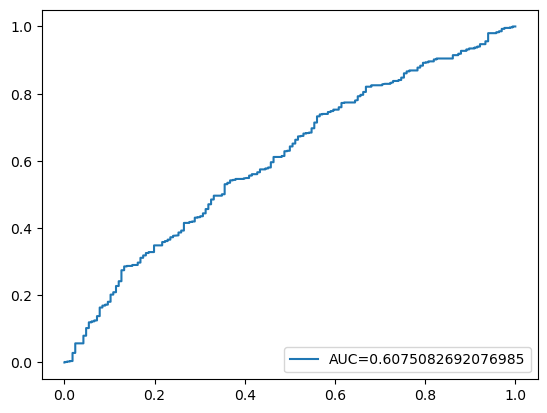

In [39]:
#plot ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [40]:
y_pred_proba

array([0.88194324, 0.87790054, 0.72910834, 0.84021572, 0.73209688,
       0.75365455, 0.82306558, 0.76824514, 0.80849464, 0.87294596,
       0.79669182, 0.77316651, 0.93454631, 0.76021009, 0.93050571,
       0.77795404, 0.88706673, 0.8477458 , 0.81253975, 0.79913164,
       0.80223479, 0.76109993, 0.90786257, 0.70916393, 0.75496049,
       0.74118219, 0.68462759, 0.69677596, 0.83131419, 0.76100325,
       0.90732547, 0.67311309, 0.70939443, 0.89828057, 0.79385891,
       0.75331451, 0.85971407, 0.89185302, 0.83803171, 0.71081217,
       0.89818556, 0.79552949, 0.88757089, 0.83818846, 0.74152221,
       0.75141975, 0.80331592, 0.7483598 , 0.9124593 , 0.69089078,
       0.87288038, 0.86471489, 0.91618919, 0.79981994, 0.76624479,
       0.82830232, 0.75384918, 0.7959391 , 0.74626496, 0.84922156,
       0.76384091, 0.75816172, 0.83502527, 0.73662238, 0.81205185,
       0.84748646, 0.75246023, 0.88164678, 0.77677113, 0.86200992,
       0.70727743, 0.82289064, 0.72985513, 0.90771844, 0.85187

In [41]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

# DecisionTreeClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model_tree=DecisionTreeClassifier(max_depth=1)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [44]:
y_predict=model_tree.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

0.80897583429229


RandomForest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
forest=RandomForestClassifier()
forest.fit(X_train, y_train)
y_predict=forest.predict(X_test)
forestacc=accuracy_score(y_test, y_predict)
print("Forest Accuracy: %.3f" % forestacc)

Forest Accuracy: 0.784


In [48]:
forest1=RandomForestClassifier(criterion='gini', 
                             n_estimators=10,
                             random_state=1,
                             n_jobs=2)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Задаем начальные значения оптимумов
оптимум_acc = 0
оптимум_auc = 0

# Задаем параметры для цикла
макс_количество_деревьев = 100  # замените на ваше максимальное значение
ii = [0] * (макс_количество_деревьев + 1)
acc = [0] * (макс_количество_деревьев + 1)
auc = [0] * (макс_количество_деревьев + 1)

# Цикл по количеству деревьев
for i in range(1, макс_количество_деревьев + 1):
    # Создаем модель RandomForestClassifier
    forest1 = RandomForestClassifier(criterion='gini', n_estimators=i, random_state=1, n_jobs=2)

    # Разбиваем данные на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Обучаем модель
    forest1.fit(X_train, y_train)

    # Предсказываем метки на тестовой выборке
    y_pred = forest1.predict(X_test)

    # Вычисляем точность
    точность = accuracy_score(y_test, y_pred)

    # Вычисляем AUC
    вероятности = forest1.predict_proba(X_test)[:, 1]  # вероятности класса 1
    auc_score = roc_auc_score(y_test, вероятности)

    # Сохраняем значения для ii, acc и auc
    ii[i] = i
    acc[i] = точность
    auc[i] = auc_score

    # Проверяем, является ли текущая точность лучше текущего оптимума
    if точность > оптимум_acc:
        оптимум_acc = точность
        оптимум_acc_i = i

    # Проверяем, является ли текущий AUC лучше текущего оптимума
    if auc_score > оптимум_auc:
        оптимум_auc = auc_score
        оптимум_auc_i = i

# Выводим результаты
print(f"Оптимальное количество деревьев для accuracy: {оптимум_acc_i}")
print(f"Оптимальная точность: {оптимум_acc}")
print(f"Оптимальное количество деревьев для AUC: {оптимум_auc_i}")
print(f"Оптимальное AUC: {оптимум_auc}")

Оптимальное количество деревьев для accuracy: 15
Оптимальная точность: 0.7944732297063903
Оптимальное количество деревьев для AUC: 99
Оптимальное AUC: 0.5832003669871155


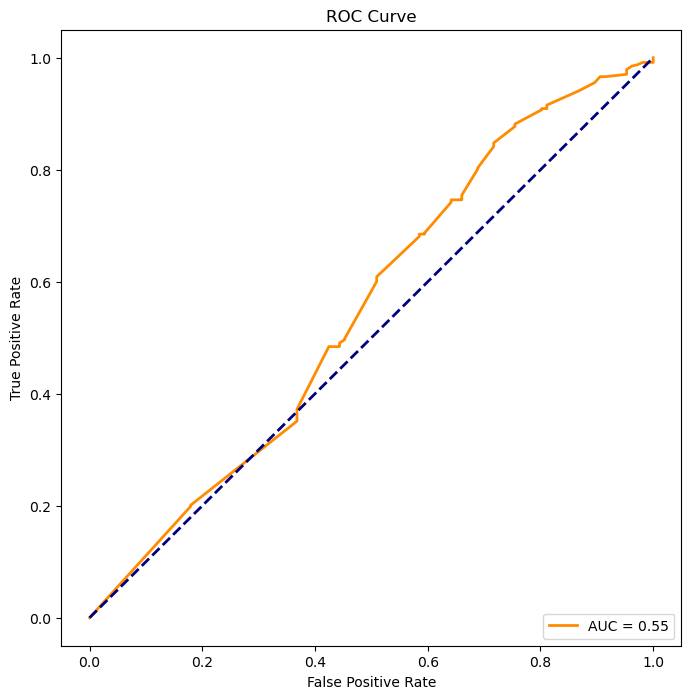

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest = RandomForestClassifier(criterion='gini', n_estimators=21, random_state=1, n_jobs=2)

forest.fit(X_train, y_train)

y_pred_proba = forest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [51]:
data.corr()

,Gender,Sum_issued,Period,Age,Family_status,Type_of_client,Education,Type_of_business,Credit_approved
Gender,1.000000,-0.095721,0.026865,0.207838,-0.027292,0.046859,-0.144975,-0.076962,0.053961
Sum_issued,-0.095721,1.000000,0.565032,0.041201,0.063956,0.096165,0.078456,0.112159,-0.024600
Period,0.026865,0.565032,1.000000,0.093011,0.046619,0.122894,0.040865,-0.049524,-0.048888
Age,0.207838,0.041201,0.093011,1.000000,0.134659,0.175372,-0.124109,-0.108144,0.137241
Family_status,-0.027292,0.063956,0.046619,0.134659,1.000000,0.074775,-0.015895,0.053500,0.035031
Type_of_client,0.046859,0.096165,0.122894,0.175372,0.074775,1.000000,-0.000410,-0.026368,0.228668
Education,-0.144975,0.078456,0.040865,-0.124109,-0.015895,-0.000410,1.000000,-0.260581,0.023858
Type_of_business,-0.076962,0.112159,-0.049524,-0.108144,0.053500,-0.026368,-0.260581,1.000000,-0.069737
Credit_approved,0.053961,-0.024600,-0.048888,0.137241,0.035031,0.228668,0.023858,-0.069737,1.000000


<Axes: >

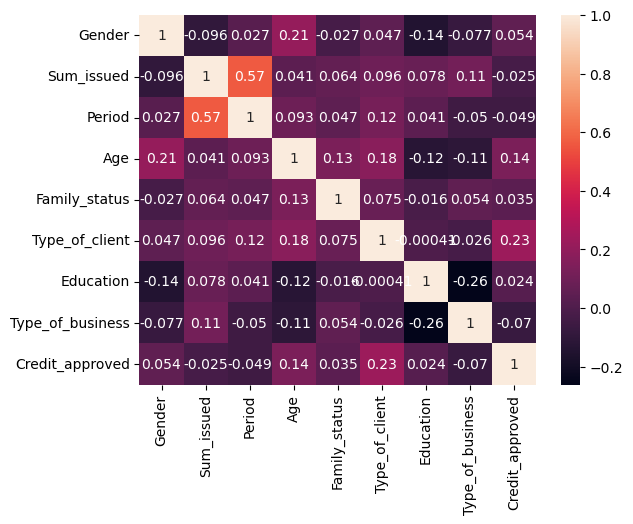

In [52]:
import seaborn as sns  
sns.heatmap(data.corr(), annot=True)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score 

In [54]:
y=data.Credit_approved

In [55]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2889    0.0
2890    0.0
2891    0.0
2892    0.0
2893    1.0
Name: Credit_approved, Length: 2894, dtype: float64

In [56]:
# Gradient Boosting Regression Model   
gbr = GradientBoostingRegressor()     # Creating an object of Gradient Boosting Regressor class 
gbr.fit(X_train, y_train) 
#calculating the metrics for the model  
y_pred = gbr.predict(X_test) 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)  
print("Mean Squared Error:", mse)  
print("R-Squared:", r2)

Mean Squared Error: 0.1519277320728476
R-Squared: -0.015844366106216867


In [57]:
pip install GradientBoostingRegressor

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement GradientBoostingRegressor (from versions: none)
ERROR: No matching distribution found for GradientBoostingRegressor


In [58]:
X_test.head()

,Gender,Sum_issued,Period,Age,Family_status,Type_of_client,Education,Type_of_business
1905,0,4000,15,30,2.0,1.0,2.0,3.0
1055,0,5000,12,30,1.0,0.0,4.0,1.0
2471,0,8000,18,35,2.0,1.0,2.0,3.0
1133,1,6000,18,36,2.0,0.0,3.0,1.0
1200,0,5000,12,26,1.0,0.0,2.0,1.0


In [59]:
print("Credit_approved:", gbr.predict([[0, 100000, 25, 25, 1,1,5,2]]))

Credit_approved: [0.9153679]


C:\Users\99290\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [60]:
import pickle

In [61]:
pickle_out=open("Scoring02.pkl", "wb")

In [62]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform (X_train) 
X_test = sc.transform (X_test)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
  # Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.7892918825561313


In [64]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

KNeighborsClassifier()

In [65]:
y_pred = knn.predict (X_test)

In [66]:
from sklearn.metrics import confusion_matrix, precision_score 
cm = confusion_matrix (y_test, y_pred) 
print(cm)

[[ 14  92]
 [ 30 443]]


In [67]:
knn.predict([[1, 100000, 15, 25, 1,1,5,2]])

array([1.])

In [68]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

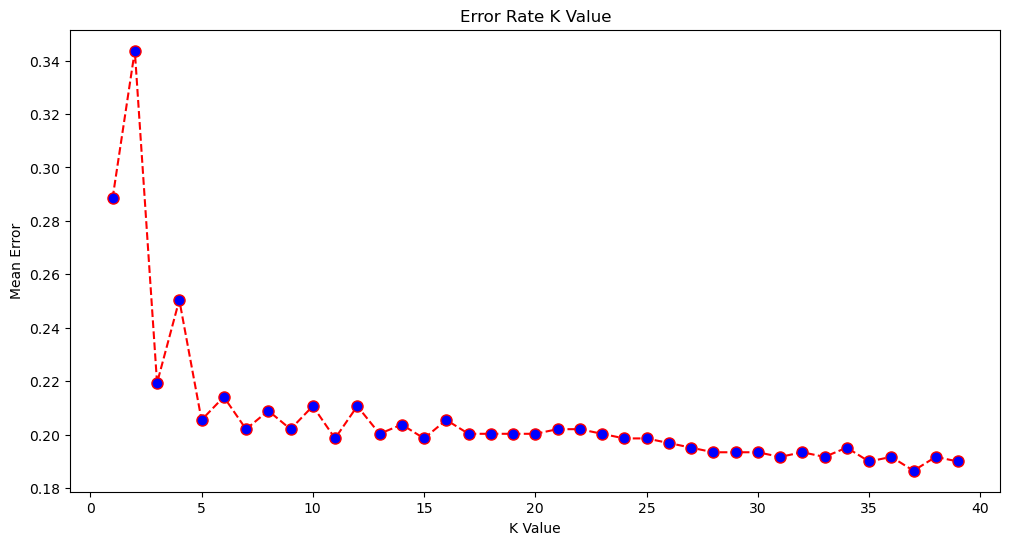

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=8)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(knn.score(X_test, y_test))

0.8100172711571675


In [72]:
confusion_matrix(y_test, y_pred)

array([[ 14,  92],
       [ 30, 443]], dtype=int64)

In [73]:
pd.crosstab(y_test, y_pred)

col_0,0.0,1.0
Credit_approved,,
0.0,14,92
1.0,30,443


In [74]:
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.32      0.13      0.19       106
         1.0       0.83      0.94      0.88       473

    accuracy                           0.79       579
   macro avg       0.57      0.53      0.53       579
weighted avg       0.73      0.79      0.75       579



In [75]:
import pickle
pickle_out = open("Scoring02.pkl","wb")
pickle.dump(knn, pickle_out)
pickle_out.close()

In [76]:
data

,Gender,Sum_issued,Period,Age,Family_status,Type_of_client,Education,Type_of_business,Credit_approved
0,0,5000,12,26,2.0,1.0,4.0,4.0,1.0
1,0,4000,12,37,2.0,1.0,4.0,3.0,1.0
2,0,30000,12,52,2.0,1.0,4.0,4.0,1.0
3,0,40000,24,33,2.0,0.0,4.0,3.0,1.0
4,0,40000,24,35,2.0,1.0,4.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...
2889,0,10000,12,27,1.0,1.0,3.0,1.0,0.0
2890,0,10000,12,29,2.0,0.0,2.0,4.0,0.0
2891,0,10000,12,25,1.0,0.0,2.0,1.0,0.0
2892,0,10000,18,25,1.0,1.0,4.0,1.0,0.0
